In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install autocorrect

     ------------------------------------ 622.8/622.8 kB 754.4 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622364 sha256=37b0a2ae136b7fe40eecfe924876436bbd49bee2a3a4a1afc1915062cef3c604
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\ab\0f\23\3c010c3fd877b962146e7765f9e9b08026cac8b035094c5750
Successfully built autocorrect
Note: you may need to restart the kernel to use updated packages.


# For Using NLP this steps needed to perform

1. Tokenization: We break down the text into tokens. Check the example below to see how this is done.
2. Stemming: We remove the prefixes and suffixes to obtain the root word. Check the example below to see how it’s done.
3. Lemmatization: We group together different inflected forms of a word into a base word called lemma. Check the example below  how it’s done.
4. POS tagging: We identify the parts of speech for different tokens. Check the example below to see how it’s done.
5. Named entity recognition: We classify named entities mentioned in the text into categories such as “People,” “Locations,” “Organizations,” and so on. Check the example below to see how it’s done.


In [42]:
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from autocorrect import Speller
spell=Speller()
from tqdm import tqdm
import re

import nltk
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [64]:
data=pd.read_csv(r'C:/Users/DELL/Desktop/Flip_Robo/Task_12-12-22/Spam-Project/Spam Project/spam.csv',encoding='ISO-8859-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [65]:
# Removing Unwanted column from data base
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [66]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [67]:
# for better understanding we just rename the column name

data.rename(columns={'v1':'labels','v2':'messages'},inplace=True)

In [68]:
data

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Visualize the Spam words

How we know that the message is spam or not, so there are some words which are consider as spam. So now we are going to list the spam words with the help of wordcloud Library

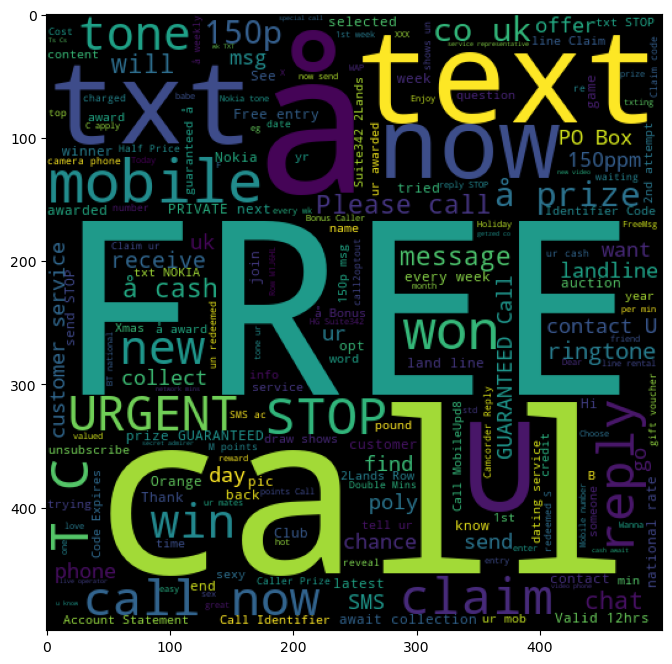

In [69]:
spam_words=' '.join(list(data[data['labels']=='spam']['messages']))
spam_wc=WordCloud(width=500,height=500).generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

# Lets Visualize the Ham words

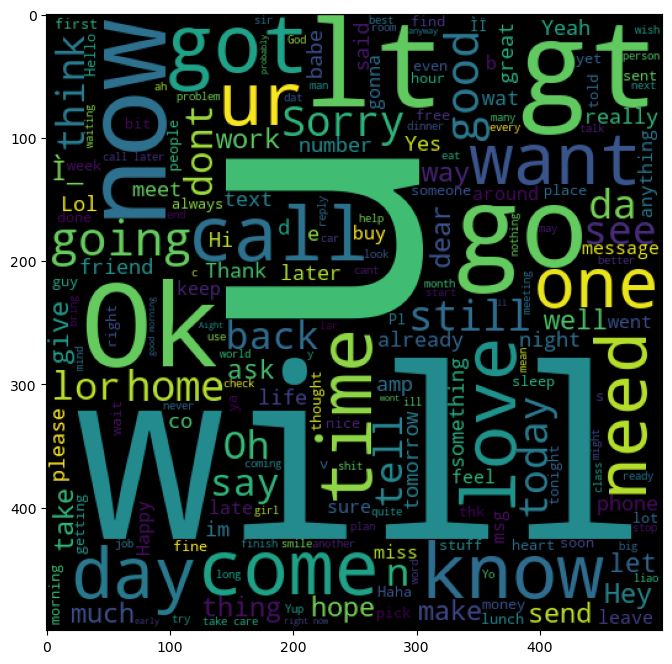

In [70]:
ham_words= ' '.join(list(data[data['labels']=='ham']['messages']))
ham_wc= WordCloud(width=500,height=500).generate(ham_words)
plt.figure(figsize=(10,8))
plt.imshow(ham_wc)
plt.show()

In [71]:
data.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [72]:
# Encoding our Labels
data['labels']=data['labels'].apply(lambda x: 1 if x=='spam' else 0)

In [73]:
# preprocessing the Messages
new_data=[]

for i in tqdm(range(data.shape[0])):
    lines=data.iloc[i,1]
    # removing non alphabatic characters
    lines= re.sub('[^A-Za-z]',' ',lines)
    # lowering the every word
    lines=lines.lower()
    
    # tokenization
    tokenized_lines=word_tokenize(lines)
    
    # removing stop words ,stemming and spell correction
    processed_lines=[]
    for i in tokenized_lines:
        if i not in set(stopwords.words('english')):
            processed_lines.append(spell(stemmer.stem(i)))
    final_lines=' '.join(processed_lines)
    new_data.append(final_lines)       
   

100%|██████████| 5572/5572 [04:33<00:00, 20.38it/s]


In [74]:
lines

'rofl  its true to its name'

In [75]:
tokenized_lines

['rofl', 'its', 'true', 'to', 'its', 'name']

In [76]:
processed_lines

['roll', 'true', 'name']

After performing preprcessing steps we have only the word which we wanted

In [77]:
len(new_data)

5572

In [78]:
Y=data['labels']
Y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: labels, Length: 5572, dtype: int64

In [79]:
Y.value_counts()

0    4825
1     747
Name: labels, dtype: int64

# Now Split the data into train and test



In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(new_data,Y,test_size=0.25)

In [81]:
X_train

['bluray player',
 'mmmm love much ahmad wait year begin every second take closer side happy new year love',
 'sir goodman free call',
 'yar lor wait mum finish sch lunch lor whole more stay home clean room room quit clean hee',
 'take italian food pretty dress anti',
 'hi spoke maneesha v like know satisfy expert reply toll free ye',
 'ok',
 'ok tell half hr b u come need prepare',
 'ya sri better yi tho',
 'prefer free day tue wed fri oso ask working lor',
 'ok anybody ask abt u tel p',
 'yeah probably still got ta check leo',
 'honey pl find much sell predict nigeria mani time use import reply monday',
 'office around pm go host',
 'got call tool',
 'k call close',
 'cup u tell ppl im gone b bit l co base hav gon past co full im still waiting pete x',
 'ok call mom instead fun',
 'hey book pilot yoga lesson already haha',
 'cbe really good nowadays lot shop showroom city shape good',
 'respect since talk boston person statement lol would chang realize said nyc say boston',
 'good af

In [82]:
len(X_test)

1393

In [83]:
len(X_train)

4179

So, here we can see that X_train have 4179 data and X_test have 1393 data which means 75% data is for training data and 25% data for testing purose

In [84]:
Y_train

5159    0
4169    0
3766    0
570     0
4032    0
       ..
600     0
3368    0
3731    0
5443    1
4711    0
Name: labels, Length: 4179, dtype: int64

In [85]:
Y_test

4437    0
2066    0
4215    0
840     0
3009    0
       ..
1603    0
2178    0
449     0
3316    0
324     0
Name: labels, Length: 1393, dtype: int64

# Vectorization
Here model will not understand the word so we neet to convert it into a vector means in number

In [86]:
matrix=CountVectorizer()

In [87]:
X_train_vect=matrix.fit_transform(X_train).toarray()
X_test_vect=matrix.transform(X_test).toarray()

In [88]:
X_train

['bluray player',
 'mmmm love much ahmad wait year begin every second take closer side happy new year love',
 'sir goodman free call',
 'yar lor wait mum finish sch lunch lor whole more stay home clean room room quit clean hee',
 'take italian food pretty dress anti',
 'hi spoke maneesha v like know satisfy expert reply toll free ye',
 'ok',
 'ok tell half hr b u come need prepare',
 'ya sri better yi tho',
 'prefer free day tue wed fri oso ask working lor',
 'ok anybody ask abt u tel p',
 'yeah probably still got ta check leo',
 'honey pl find much sell predict nigeria mani time use import reply monday',
 'office around pm go host',
 'got call tool',
 'k call close',
 'cup u tell ppl im gone b bit l co base hav gon past co full im still waiting pete x',
 'ok call mom instead fun',
 'hey book pilot yoga lesson already haha',
 'cbe really good nowadays lot shop showroom city shape good',
 'respect since talk boston person statement lol would chang realize said nyc say boston',
 'good af

In [89]:
X_train_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [90]:
X_train

['bluray player',
 'mmmm love much ahmad wait year begin every second take closer side happy new year love',
 'sir goodman free call',
 'yar lor wait mum finish sch lunch lor whole more stay home clean room room quit clean hee',
 'take italian food pretty dress anti',
 'hi spoke maneesha v like know satisfy expert reply toll free ye',
 'ok',
 'ok tell half hr b u come need prepare',
 'ya sri better yi tho',
 'prefer free day tue wed fri oso ask working lor',
 'ok anybody ask abt u tel p',
 'yeah probably still got ta check leo',
 'honey pl find much sell predict nigeria mani time use import reply monday',
 'office around pm go host',
 'got call tool',
 'k call close',
 'cup u tell ppl im gone b bit l co base hav gon past co full im still waiting pete x',
 'ok call mom instead fun',
 'hey book pilot yoga lesson already haha',
 'cbe really good nowadays lot shop showroom city shape good',
 'respect since talk boston person statement lol would chang realize said nyc say boston',
 'good af

In [91]:
X_test_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

We see the difference between X_train and x_train_vect,after vectorization our model can understand the data

In [92]:
Y_train

5159    0
4169    0
3766    0
570     0
4032    0
       ..
600     0
3368    0
3731    0
5443    1
4711    0
Name: labels, Length: 4179, dtype: int64

In [93]:
Y_test

4437    0
2066    0
4215    0
840     0
3009    0
       ..
1603    0
2178    0
449     0
3316    0
324     0
Name: labels, Length: 1393, dtype: int64

Training and testing data is ready ,Now its time to train our model

# Train our Model using Naive Bayes

In [94]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [95]:
model.fit(X_train_vect,Y_train)

GaussianNB()

In [96]:
model.classes_


array([0, 1], dtype=int64)

Now we predict our data

In [97]:
Y_pred=model.predict(X_test_vect)
Y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [98]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [99]:
accuracy_score(Y_test,Y_pred) * 100

84.92462311557789

SO.here our model accuray is almost 84-85 

In [100]:
confusion_matrix(Y_test,Y_pred)

array([[1010,  187],
       [  23,  173]], dtype=int64)